<a href="https://colab.research.google.com/github/Skshamim02/Navigating-the-Stock-Market-with-Data-Science/blob/main/stock_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install yfinance
!pip install yahoofinancials

import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials


In [18]:
import yfinance as yf

wipro_df = yf.download('WIPRO.NS',
                      start='2000-01-01',
                      end='2023-08-31',
                      progress=False,
)
print(wipro_df.head())

                  Open        High         Low       Close  Adj Close   Volume
Date                                                                          
2000-01-03  102.150002  102.157501  102.150002  102.157501  83.336517    42639
2000-01-04  110.330627  110.330627  110.330627  110.330627  90.003876   117119
2000-01-05  110.330627  119.158127  101.812508  112.128754  91.470734  3527919
2000-01-06  117.926254  119.362503  104.625008  109.959381  89.701027  1942399
2000-01-07  103.162506  103.162506  101.163757  101.163757  82.525856   269599


In [19]:
print(wipro_df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2000-01-03  102.150002  102.157501  102.150002  102.157501   83.336517   
2000-01-04  110.330627  110.330627  110.330627  110.330627   90.003876   
2000-01-05  110.330627  119.158127  101.812508  112.128754   91.470734   
2000-01-06  117.926254  119.362503  104.625008  109.959381   89.701027   
2000-01-07  103.162506  103.162506  101.163757  101.163757   82.525856   
...                ...         ...         ...         ...         ...   
2023-08-24  418.750000  420.000000  412.000000  412.700012  412.700012   
2023-08-25  410.000000  411.299988  407.100006  409.700012  409.700012   
2023-08-28  411.450012  412.450012  407.649994  408.049988  408.049988   
2023-08-29  409.649994  411.899994  407.100006  408.100006  408.100006   
2023-08-30  410.000000  410.200012  406.649994  407.200012  407.200012   

             Volume  
Date           

<Axes: title={'center': "WIPRO.NS's stock price"}, xlabel='Date'>

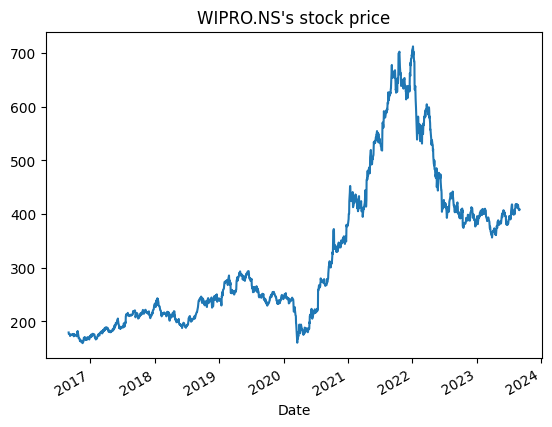

In [20]:
ticker = yf.Ticker('WIPRO.NS')
wipro_df = ticker.history(period="7y")
wipro_df['Close'].plot(title="WIPRO.NS's stock price")

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [22]:
wipro_df = wipro_df.reset_index()[['Close', 'High', 'Low', 'Open']]



In [23]:
wipro_df

,Close,High,Low,Open
0,179.076157,180.660585,177.109294,179.130801
1,176.271561,178.365912,175.379188,178.365912
2,176.144089,176.854344,174.577875,176.289777
3,175.889114,176.799702,174.832839,176.654014
4,175.470230,178.384110,174.851034,177.673854
...,...,...,...,...
1726,409.700012,411.299988,407.100006,410.000000
1727,408.049988,412.450012,407.649994,411.450012
1728,408.100006,411.899994,407.100006,409.649994
1729,407.200012,410.200012,406.649994,410.000000


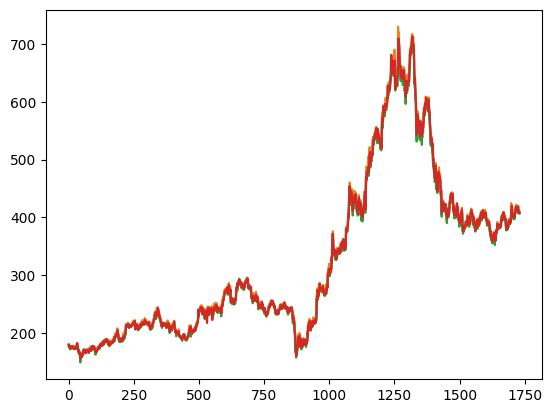

In [24]:
plt.plot(wipro_df)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
wipro_df=scaler.fit_transform(np.array(wipro_df).reshape(-1,1))


In [27]:
print(wipro_df)

[[0.05227895]
 [0.05500085]
 [0.04890007]
 ...
 [0.44898399]
 [0.44288545]
 [0.44554818]]


In [28]:
#splitting dataset into train and test split
training_size=int(len(wipro_df)*0.65)
test_size=len(wipro_df)-training_size
train_data,test_data=wipro_df[0:training_size,:],wipro_df[training_size:len(wipro_df),:1]

In [29]:
training_size,test_size

(4500, 2424)

In [32]:
train_data

array([[0.05227895],
       [0.05500085],
       [0.04890007],
       ...,
       [0.45092467],
       [0.44065922],
       [0.44210144]])

In [33]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [34]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [35]:
print(X_train.shape), print(y_train.shape)

(4399, 100)
(4399,)


(None, None)

In [36]:
print(X_test.shape), print(ytest.shape)

(2323, 100)
(2323,)


(None, None)

In [37]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [40]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(3))
model.compile(loss='mean_squared_error',optimizer='adam')

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 3)                 153       
                                                                 
Total params: 50,953
Trainable params: 50,953
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
69/69 [==============================] - 24s 234ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 2/100
69/69 [==============================] - 15s 217ms/step - loss: 1.6990e-04 - val_loss: 0.0047
Epoch 3/100
69/69 [==============================] - 19s 272ms/step - loss: 1.5940e-04 - val_loss: 0.0043
Epoch 4/100
69/69 [==============================] - 15s 218ms/step - loss: 1.4997e-04 - val_loss: 0.0028
Epoch 5/100
69/69 [==============================] - 15s 224ms/step - loss: 1.4633e-04 - val_loss: 0.0026
Epoch 6/100
69/69 [==============================] - 21s 310ms/step - loss: 1.4309e-04 - val_loss: 0.0020
Epoch 7/100
69/69 [==============================] - 15s 217ms/step - loss: 1.4892e-04 - val_loss: 0.0037
Epoch 8/100
69/69 [==============================] - 15s 218ms/step - loss: 1.3248e-04 - val_loss: 0.0015
Epoch 9/100
69/69 [==============================] - 16s 236ms/step - loss: 1.3266e-04 - val_loss: 0.0011
Epoch 10/100
69/69 [==============================